In [45]:
import numpy as np
import pandas as pd
import xarray as xr
from joblib import dump, load
from sklearn.model_selection import train_test_split
import math as mt
from math import e
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Input

In [2]:
# Read Orography
OroData = xr.open_dataset('../../../Data/eraDown/ERA5_2degree_Down/DailyMean/ERA5IGP_Orography.nc')

In [3]:
#Surface data
t2mData = xr.open_dataset('../../../Data/CMIP6/ESM/historic/NDJF/tasNHRegrid_NDJFday_IITM-ESM_historical_r1i1p1f1_gn_18500101-20141231.nc')
rhData  = xr.open_dataset('../../../Data/CMIP6/ESM/historic/NDJF/hursNHRegrid_NDJFday_IITM-ESM_historical_r1i1p1f1_gn_18500101-20141231.nc')
u10Data = xr.open_dataset('../../../Data/CMIP6/ESM/historic/NDJF/uasNHRegrid_NDJFday_IITM-ESM_historical_r1i1p1f1_gn_18500101-20141231.nc')
v10Data = xr.open_dataset('../../../Data/CMIP6/ESM/historic/NDJF/vasNHRegrid_NDJFday_IITM-ESM_historical_r1i1p1f1_gn_18500101-20141231.nc')


In [4]:
# Level Data
tLevData = xr.open_dataset('../../../Data/CMIP6/ESM/historic/NDJF/taNHRegrid_NDJFday_IITM-ESM_historical_r1i1p1f1_gn_18500101-20141231.nc')
zLevData = xr.open_dataset('../../../Data/CMIP6/ESM/historic/NDJF/zgNHRegrid_NDJFday_IITM-ESM_historical_r1i1p1f1_gn_18500101-20141231.nc')
wLevData = xr.open_dataset('../../../Data/CMIP6/ESM/historic/NDJF/wapNHRegrid_NDJFday_IITM-ESM_historical_r1i1p1f1_gn_18500101-20141231.nc')
uLevData = xr.open_dataset('../../../Data/CMIP6/ESM/historic/NDJF/uaNHRegrid_NDJFday_IITM-ESM_historical_r1i1p1f1_gn_18500101-20141231.nc')

In [66]:
wLevData.wap.sel(plev=70000)

<xarray.DataArray 'wap' (time: 19841, latitude: 46, longitude: 180)>
[164283480 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1850-01-01T12:00:00 ... 2015-01-01T12:00:00
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 82.0 ... 6.0 4.0 2.0 0.0
    plev       float64 7e+04
Attributes:
    standard_name:  lagrangian_tendency_of_air_pressure
    long_name:      Omega (=dp/dt)
    units:          Pa s-1
    comment:        Omega (vertical velocity in pressure coordinates, positiv...
    cell_methods:   time: mean
    cell_measures:  area: areacella
    history:        2021-01-28T13:27:36Z altered by CMOR: Inverted axis: lat.

In [65]:
wLevData.wap.sel(plev=70000).values

array([[[ 0.00849797,  0.00849797,  0.00849797, ...,  0.00849797,
          0.00849797,  0.00849797],
        [ 0.0162156 ,  0.01588074,  0.01554568, ...,  0.01661014,
          0.0164784 ,  0.01634689],
        [ 0.04936105,  0.04829626,  0.04723114, ...,  0.04937449,
          0.04936884,  0.04936435],
        ...,
        [ 0.10878066,  0.08466846,  0.05928695, ...,  0.13585295,
          0.18139784,  0.15802872],
        [ 0.03223966,  0.00226229, -0.01697282, ...,  0.07386569,
          0.11187333,  0.09050131],
        [ 0.01468285, -0.0158001 , -0.03291176, ...,  0.05009511,
          0.07228946,  0.0563443 ]],

       [[ 0.02940887,  0.02940887,  0.02940887, ...,  0.02940887,
          0.02940887,  0.02940887],
        [ 0.02873865,  0.02880821,  0.02887772, ...,  0.02842687,
          0.02853035,  0.02863428],
        [ 0.02702907,  0.02726183,  0.02749459, ...,  0.02625604,
          0.02651036,  0.02676804],
        ...,
        [ 0.05367675,  0.06701736,  0.09561896, ...,  

In [20]:
t2mD = t2mData.sel(latitude=slice(32,24),longitude=slice(74,86))
u10D = u10Data.sel(latitude=slice(32,24),longitude=slice(74,86))
v10D = v10Data.sel(latitude=slice(32,24),longitude=slice(74,86))
rhmD = rhData.sel(latitude=slice(32,24),longitude=slice(74,86))
tLevD = tLevData.sel(latitude=slice(32,24),longitude=slice(74,86))
zLevD = zLevData.sel(latitude=slice(32,24),longitude=slice(74,86))
wLevD = wLevData.sel(latitude=slice(32,24),longitude=slice(74,86),plev=70000)
OroD = OroData.sel(latitude=slice(32,24),longitude=slice(74,86))
uLevD=uLevData.sel(latitude=slice(32,24),longitude=slice(74,86))

In [6]:
rhData

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 46, longitude: 180, time: 19841)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-01T12:00:00 ... 2015-01-01T12:00:00
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 82.0 ... 6.0 4.0 2.0 0.0
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    hurs       (time, latitude, longitude) float32 ...
Attributes:
    CDI:                    Climate Data Interface version 1.9.5 (http://mpim...
    history:                Mon Mar 08 17:42:33 2021: cdo remapbil,/home/cccr...
    source:                 IITM-ESM (2015): \naerosol: prescribed MAC-v2\nat...
    institution:            Centre for Climate Change Research, Indian Instit...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          Spin-up documentation
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                iitm-esm@tropmet.res.in
    creation_date:          2019-11-29T08:38:26Z
    data_specs_version:     01.00.29
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacella
    forcing_index:          1
    frequency:              day
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.CCCR-IITM.II...
    grid:                   gs2x2
    grid_label:             gn
    initialization_index:   1
    institution_id:         CCCR-IITM
    mip_era:                CMIP6
    nominal_resolution:     250 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       IITM-ESM
    parent_time_units:      days since 1850-01-01
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  atmos
    references:             Model described by Swapna, P., et. al (2015), Bul...
    source_id:              IITM-ESM
    source_type:            AOGCM
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               day
    table_info:             Creation Date:(14 December 2018) MD5:b2d32d1a0d9b...
    title:                  IITM-ESM output prepared for CMIP6
    variable_id:            hurs
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CCCR-IITM is license...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/c3922a8c-5136-4cc2-b636-0fb49c3a327d
    CDO:                    Climate Data Operators version 1.9.5 (http://mpim...

In [7]:
# Calculate wind speed and relative humidity inv  ushear
ws = ((v10D.vas.values**2)+(u10D.uas.values**2))**0.5
ws_ds = xr.Dataset({'ws': (('time','latitude','longitude'), ws)},
                   coords={'time': v10D.time,'latitude': v10D.latitude,'longitude': v10D.longitude})

rh_ds = xr.Dataset({'rh': (('time','latitude','longitude'), rhmD.hurs)},
                   coords={'time': v10D.time,'latitude': v10D.latitude,'longitude': v10D.longitude})

#Calculate inv
inv=t2mD.tas.values-tLevD.ta.sel(plev=85000).values
inv_ds = xr.Dataset({'inv': (('time','latitude','longitude'), inv)}, coords={'time': v10D.time,'latitude': v10D.latitude,'longitude': v10D.longitude})
inv_ds.attrs
inv_ds.attrs['units']='K'
inv_ds.attrs['long_name']='t2m - t850'

#u shear calculation
ushear=(uLevD.ua.sel(plev=85000).values-u10D.uas.values)/(zLevD.zg.sel(plev=85000).values) 
ushear_ds = xr.Dataset({'ushear': (('time','latitude','longitude'), ushear)}, coords={'time': v10D.time,'latitude': v10D.latitude,'longitude': v10D.longitude})
ushear_ds.attrs['units']='s-1'
ushear_ds.attrs['long_name']='(u10 - u850)/z850'

In [36]:
AOData = xr.open_dataset('IITM-ESM-AOindex-NDJF-Daily-1980-2014.nc')
AO5D=AOData.AO.rolling(time=5).mean()

AO5DAll=AO5D[((AO5D.time.dt.month>11) | (AO5D.time.dt.month<2)) & 
             (AO5D.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31'))
#ao

In [37]:
EUData = xr.open_dataset('IITM-ESM-EUindex-NDJF-Daily-1980-2014.nc')
EU5D=EUData.EU.rolling(time=5).mean()

EU5DAll=EU5D[((EU5D.time.dt.month>11) | (EU5D.time.dt.month<2)) & 
             (EU5D.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31'))


In [15]:
# create mask
oro = OroD.z
oro.values = OroD.z.values/9.81
oro.attrs
oro.attrs['units']='meter'
oro.attrs['long_name']='Orography'
oro.values[oro.values>500.1]=np.NaN
mask=oro.values/oro.values

In [21]:
# Apply Mask 
t2mD.tas.values=t2mD.tas.values*mask
ws_ds.ws.values=ws_ds.ws.values*mask
rh_ds.rh.values=rh_ds.rh.values*mask
wLevD.wap.values=wLevD.wap.values*mask
inv_ds.inv.values=inv_ds.inv.values*mask
ushear_ds.ushear.values=ushear_ds.ushear.values*mask

In [23]:
# Feild mean
t2mTS1=t2mD.mean(dim=['latitude','longitude'], skipna=True).tas
wsTS1=ws_ds.mean(dim=['latitude','longitude'], skipna=True).ws
rhTS1=rh_ds.mean(dim=['latitude','longitude'], skipna=True).rh
wTS1=wLevD.mean(dim=['latitude','longitude'], skipna=True).wap
invTS1=inv_ds.mean(dim=['latitude','longitude'], skipna=True).inv
ushearTS1=ushear_ds.mean(dim=['latitude','longitude'], skipna=True).ushear

In [25]:
# shift one day so we can take values of previous day
t2mTS=t2mTS1.shift(time=1)
wsTS=wsTS1.shift(time=1)
rhTS=rhTS1.shift(time=1)
wTS=wTS1.shift(time=1)
invTS=invTS1.shift(time=1)
ushearTS=ushearTS1.shift(time=1)

In [38]:
# Select required time 
t2m=t2mTS[((t2mTS.time.dt.month>11) | (t2mTS.time.dt.month<2)) & (t2mTS.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31'))
ws=wsTS[((wsTS.time.dt.month>11) | (wsTS.time.dt.month<2)) & (wsTS.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31'))
inv=invTS[((wsTS.time.dt.month>11) | (wsTS.time.dt.month<2)) & (wsTS.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31'))
rh=rhTS[((wsTS.time.dt.month>11) | (wsTS.time.dt.month<2)) & (wsTS.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31'))
w=wTS[((wsTS.time.dt.month>11) | (wsTS.time.dt.month<2)) & (wsTS.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31'))
ushear=ushearTS[((wsTS.time.dt.month>11) | (wsTS.time.dt.month<2)) & (wsTS.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31'))

In [61]:
w

<xarray.DataArray 'wap' (time: 2170)>
array([-0.04139236, -0.02497948, -0.08330257, ..., -0.03634319,
        0.00842667,  0.10926954], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T12:00:00 ... 2014-12-31T12:00:00
    plev     float64 7e+04
    height   float64 10.0

In [55]:
X       = pd.DataFrame([t2m.values,ws.values,rh.values/100.0,inv.values,w.values,ushear.values*100.0,AO5DAll.values,
                        EU5DAll.values],
                       index=['t2m', 'ws', 'rh','inv', 'w', 'ushear', 'AO5D', 'EU5D']).T[:]
X.index = pd.to_datetime(t2m.time.values)
X

,t2m,ws,rh,inv,w,ushear,AO5D,EU5D
1980-01-01 12:00:00,286.060791,1.801349,0.425674,4.287883,-0.041392,0.097172,0.457634,-0.913658
1980-01-02 12:00:00,286.914581,2.230043,0.435390,4.594827,-0.024979,0.075982,0.730044,-1.117071
1980-01-03 12:00:00,287.273315,2.172834,0.438816,4.955939,-0.083303,0.066381,0.842020,-1.347041
1980-01-04 12:00:00,285.974945,2.377618,0.481905,5.589941,-0.056414,0.083955,0.820763,-1.411323
1980-01-05 12:00:00,283.908783,1.804476,0.452880,5.122323,0.099757,0.031033,0.854270,-1.122246
...,...,...,...,...,...,...,...,...
2014-12-27 12:00:00,287.156799,2.034895,0.369810,4.208745,0.016455,0.126241,-1.636026,-0.451845
2014-12-28 12:00:00,288.714813,1.779169,0.381003,4.689711,0.041681,0.160649,-1.413739,-0.448985
2014-12-29 12:00:00,289.028748,1.411467,0.448954,4.843173,-0.036343,0.203946,-1.214189,-0.446480
2014-12-30 12:00:00,287.219482,1.781228,0.482639,5.569292,0.008427,0.224519,-1.015716,-0.459831


In [56]:
norm = StandardScaler().fit(X)
    # transform training data
X = norm.transform(X)
X
X = pd.DataFrame(norm.transform(X))
X.index = pd.to_datetime(t2m.time.values)
X

,0,1,2,3,4,5,6,7
1980-01-01 12:00:00,-127.370711,-3.293780,-3.433990,-4.084651,-8.717392,-6.726160,0.097037,-3.176108
1980-01-02 12:00:00,-127.202046,-0.699738,-2.898417,-3.852912,-5.695969,-9.702694,0.490301,-3.876825
1980-01-03 12:00:00,-127.131179,-1.045910,-2.709556,-3.580277,-16.432578,-11.051224,0.651955,-4.669027
1980-01-04 12:00:00,-127.387670,0.193246,-0.334378,-3.101615,-11.482636,-8.582718,0.621267,-4.890465
1980-01-05 12:00:00,-127.795835,-3.274857,-1.934301,-3.454660,17.266649,-16.016603,0.669638,-3.894651
...,...,...,...,...,...,...,...,...
2014-12-27 12:00:00,-127.154197,-1.880581,-6.513392,-4.144398,1.931660,-2.642887,-2.925465,-1.585256
2014-12-28 12:00:00,-126.846415,-3.427988,-5.896368,-3.781276,6.575388,2.190371,-2.604562,-1.575402
2014-12-29 12:00:00,-126.784398,-5.652970,-2.150701,-3.665414,-7.787898,8.272149,-2.316481,-1.566775
2014-12-30 12:00:00,-127.141814,-3.415535,-0.293881,-3.117205,0.453719,11.162127,-2.029958,-1.612765


In [57]:
# load saved linear model
regLin = load('../../Feb2021/Final_Models/AO_EU_SST_included/LRModel.joblib') 
regLin

LinearRegression()

In [58]:
yLR = regLin.predict(X)
y_LR_ESM_IITM = xr.Dataset({'yLR': (('time'), yLR)}, coords={'time': t2m.time.values})

In [59]:
# load Obs 
obs = load('../../Feb2021/Final_Models/AO_EU_SST_included/TSdataObs.joblib') 
LR= load('../../Feb2021/Final_Models/AO_EU_SST_included/TSdataLR.joblib')

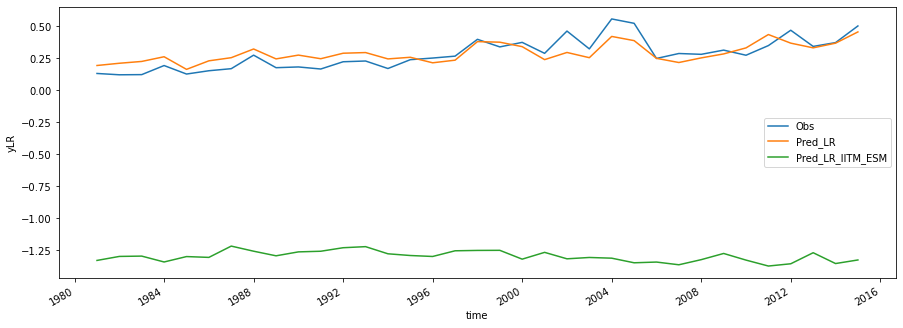

In [60]:
plt.figure(figsize=[15,5])
obs.sel(time=slice('1980-1-1','2014-12-31')).resample(time='1Y').mean().plot(label='Obs')
LR.sel(time=slice('1980-1-1','2014-12-31')).resample(time='1Y').mean().plot(label='Pred_LR')
y_LR_ESM_IITM.yLR.resample(time='1Y').mean().plot(label='Pred_LR_IITM_ESM')
#plt.ylim(0, 0.6)
plt.legend()
#plt.savefig('TS_AOEU_5D.jpeg')
plt.show()